# Libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [98]:
df = pd.read_csv("D:\STUDY\Hackathon\PROJECT\PS_20174392719_1491204439457_log.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [99]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [100]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [101]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [102]:
df.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'],axis=1,inplace=True)

In [103]:
copy = df.copy()

copy.drop(['isFraud'],axis=1,inplace=True)

In [104]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [105]:
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])

map_type = dict(zip(le.classes_, le.transform(le.classes_)))

type_mapping = pd.DataFrame.from_dict(data=map_type, orient='index')

type_mapping

,0
CASH_IN,0
CASH_OUT,1
DEBIT,2
PAYMENT,3
TRANSFER,4


In [106]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


Text(0.5, 1.0, 'Correlation Heatmap')

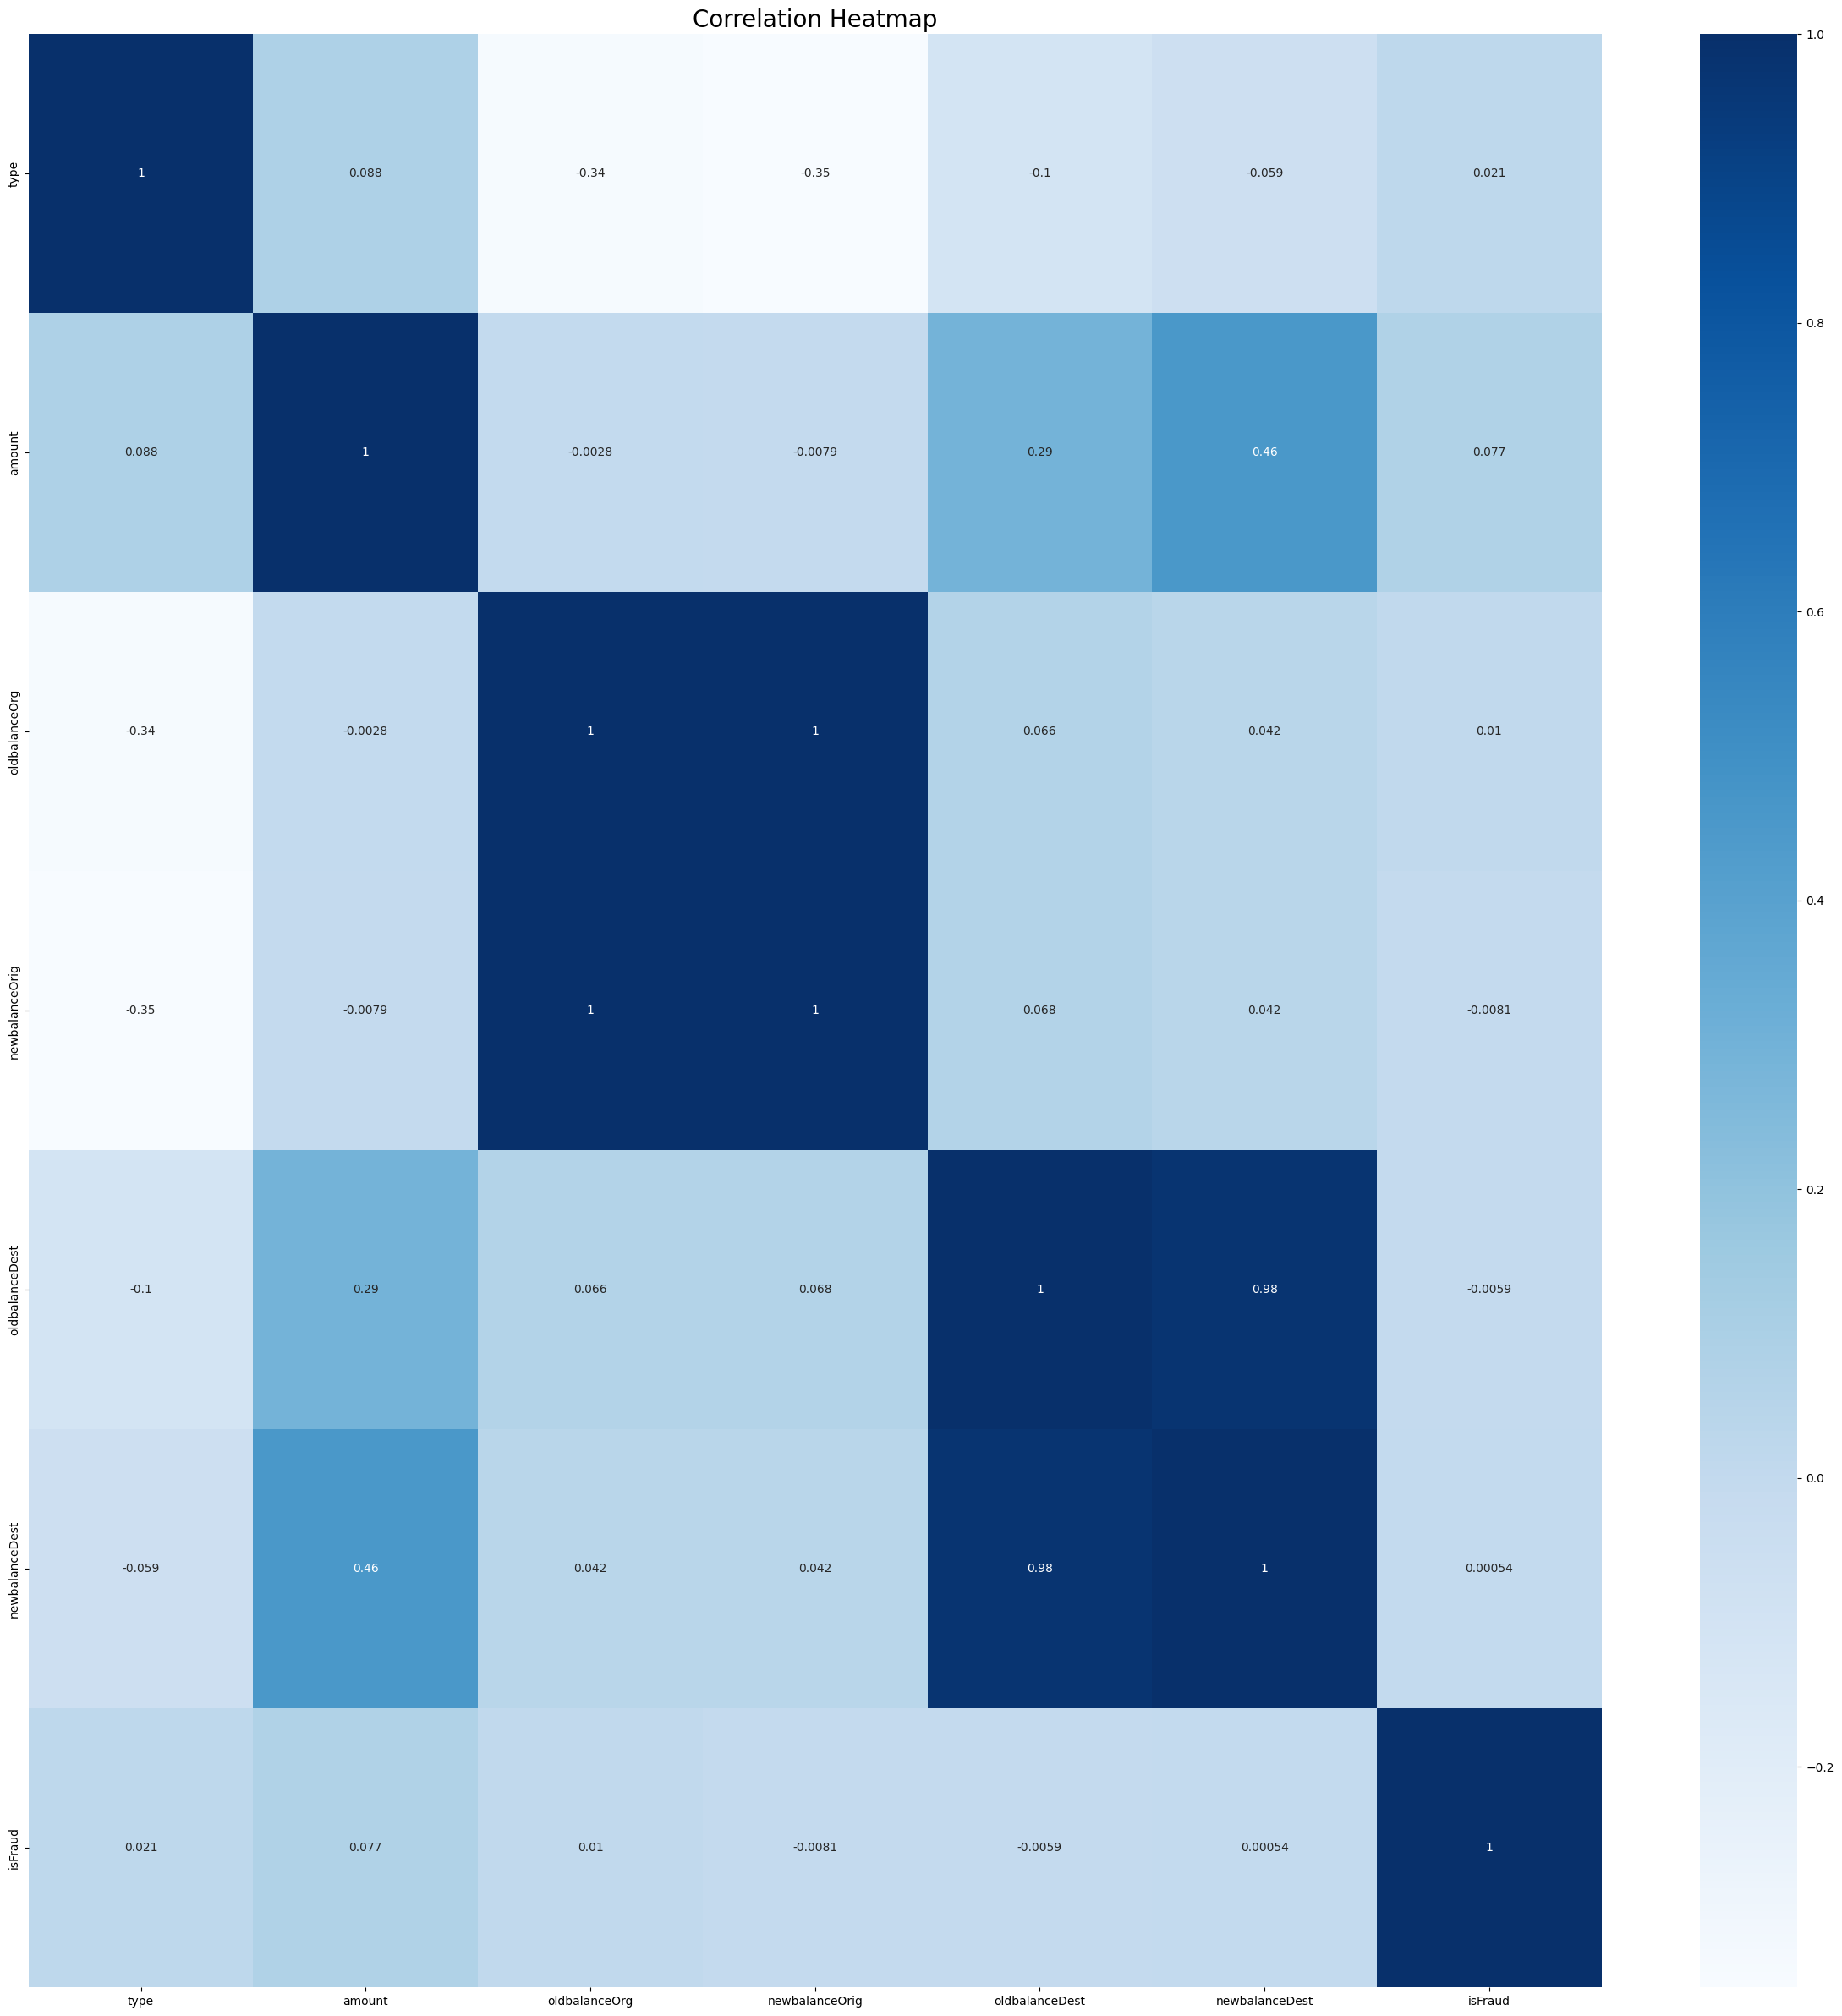

In [107]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

In [108]:
#Target = df.iloc[:,-1]

#print("Before Sampling")
#Target.value_counts()

#under_sampler = RandomUnderSampler(sampling_strategy={1:1000, 0:65})

#df_sampled, Y_sampled = under_sampler.fit_resample(copy, Target)

#df_sampled.head()

In [118]:
col = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [116]:
f = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

In [119]:
scaler = StandardScaler()
standard_features = scaler.fit_transform(f)
standard_features = pd.DataFrame(standard_features, columns =col)
standard_features.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


In [121]:
final_df = standard_features.copy()

final_df['type'] = df['type']
final_df['isFraud'] = df['isFraud']

final_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFraud
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,3,0
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,3,0
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,4,1
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,1
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,3,0


In [122]:
#final_df.to_csv('D:\STUDY\Hackathon\PROJECT\Rajasthan_hackathon\Dataset.csv', index=False)

In [123]:
type_mapping.to_csv('D:\STUDY\Hackathon\PROJECT\Rajasthan_hackathon\Type_LabelMapping.csv')

In [125]:
import joblib 

joblib.dump(scaler, 'D:\STUDY\Hackathon\PROJECT\Rajasthan_hackathon\StandardScaler.pkl')

['D:\\STUDY\\Hackathon\\PROJECT\\Rajasthan_hackathon\\StandardScaler.pkl']